In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(context="paper", style="white")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Mount to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **7. Ven diagram plot of HRCE1 vs HRCE2**

In [ ]:
from matplotlib_venn import venn2
def ven_diagram(dic, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    ven = venn2(subsets=list(dic.values()), 
               set_labels=list(dic.keys()))

    # Decoration
    ven.get_patch_by_id('10').set_color('yellow')
    ven.get_patch_by_id('01').set_color('red')
    ven.get_patch_by_id('11').set_color('orange')

    ven.get_patch_by_id('10').set_edgecolor('none')
    ven.get_patch_by_id('01').set_edgecolor('none')
    ven.get_patch_by_id('11').set_edgecolor('none')

    for text in ven.subset_labels:
        text.set_fontsize(13)

    plt.show()

**Get metadata**

In [ ]:
df_metadata = pd.read_csv(os.path.join(path, 'metadata.csv'))
df_metadata.shape

(305520, 11)

**HRCE-1 vs. HRCE-2**

In [ ]:
_df = df_metadata.dropna()

df_HRCE_1 = _df[(_df['experiment'] == 'HRCE-1')] 
df_HRCE_2 = _df[(_df['experiment'] == 'HRCE-2')] 
print(f'df_HRCE_1.shape = {df_HRCE_1.shape}, df_HRCE_2.shape = {df_HRCE_2.shape}')

df_HRCE_1.shape = (119904, 11), df_HRCE_2.shape = (126896, 11)


**Compound numbers in HRCE-1 and HRCE-2**

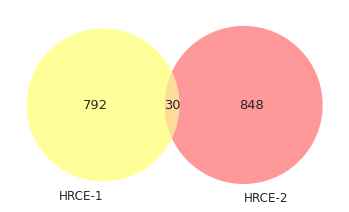

In [ ]:
dic = {
    'HRCE-1': set(df_HRCE_1['SMILES']),
    'HRCE-2': set(df_HRCE_2['SMILES'])
}   
ven_diagram(dic)

**As can be seen from the above ven diagram, in 1660 compounds, only 30 compounds are tested in both HRCE-1 and HRCE-2**

**Get the SMILES that tested at both HREC-1 and HRCE-2**

In [ ]:
smiles_list = list(set(df_HRCE_1['SMILES']) & set(df_HRCE_2['SMILES']))
print('Number of compounds = ', len(smiles_list))
print(smiles_list)

Number of compounds =  30
['NC(=O)C1=NC(F)=CNC1=O |c:6,t:3|', 'CC(C)C1=CC(=O)C(C)=CC1=O |c:8,t:3|', 'NC(=O)C1=NN(C=N1)[C@H]1O[C@H](CO)[C@@H](O)[C@H]1O |c:6,t:3|', 'CC(C)(C)NC(=O)[C@@H]1CN(CC2=CN=CC=C2)CCN1C[C@@H](O)C[C@@H](CC1=CC=CC=C1)C(=O)N[C@@H]1[C@H](O)CC2=C1C=CC=C2 |c:13,15,30,32,42,45,47,t:11,28|', 'CCOC(=O)C1=C(CSC2=CC=CC=C2)N(C)C2=CC(Br)=C(O)C(CN(C)C)=C12 |c:5,11,13,t:9,18,21,28|', 'OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)C=C1 |c:15,26,t:10,12,21,23|', 'CC(C)[C@H](NC(=O)N(C)CC1=CSC(=N1)C(C)C)C(=O)N[C@H](C[C@H](O)[C@H](CC1=CC=CC=C1)NC(=O)OCC1=CN=CS1)CC1=CC=CC=C1 |c:13,30,32,42,49,51,t:10,28,40,47|', 'CC(C)C1=NC(CN(C)C(=O)N[C@@H](CCN2CCOCC2)C(=O)N[C@H](CC[C@H](CC2=CC=CC=C2)NC(=O)OCC2=CN=CS2)CC2=CC=CC=C2)=CS1 |c:32,34,44,51,53,55,t:3,30,42,49|', 'CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@](C#N)([C@H](O)[C@@H]1O)C1=CC=C2N1N=CN=C2N)OC1=CC=CC=C1 |c:28,32,34,41,43,t:26,39|', 'COC1=CC=C2N(C(=O)C3=CC=C(Cl)C=C3)C(C)=C(CC(O)=O)C2=C1 |c:14,25,t:2,4,9,11,18|', 'CCC(CC)O[C@@H]1C=C(C[

**Compound numbers in VERO-1 and VERO-2**

df_VERO_1.shape = (8192, 11), df_VERO_2.shape = (8192, 11)


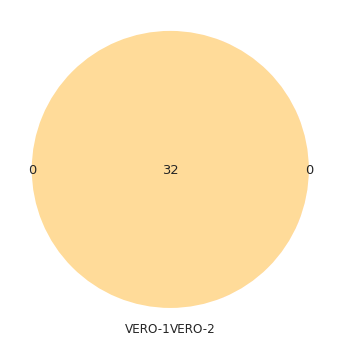

In [ ]:
df_VERO_1 = _df[(_df['experiment'] == 'VERO-1')] 
df_VERO_2 = _df[(_df['experiment'] == 'VERO-2')] 
print(f'df_VERO_1.shape = {df_VERO_1.shape}, df_VERO_2.shape = {df_VERO_2.shape}')

dic2 = {
    'VERO-1': set(df_VERO_1['SMILES']),
    'VERO-2': set(df_VERO_2['SMILES'])
}   
ven_diagram(dic2)

**As can be seen from the above ven diagram, in 1660 compounds, 32 compounds are tested in both VERO-1 and VERO-2.**

#**8. Similarity between cell types**

In [ ]:
def cosine_similarity(Arr1, Arr2, chunk=1000):
  '''To speed-up the cosine similarity calculation between too big arrays.
  Calculate similarity between one row in Arr1 to all rows in Arr2 and get the 
  max, mean, and min of the similarity. (Usually using only max is enough).
  Arguments:
  Input:
  Arr1: a numpy array
  Arr2: a numpy array
  chunk: number of row in Arr1. It is used to speep up the calculation instead 
         of calculating one by one using Scipy cosine similarity
  Ouput:
  sims_max: a 1D numpy array to store max similarity of one row in Arr1 to all 
            rows in Arr2
  sims_mean: (similar to sims_max) it is mean value instead of max
  sims_min: (similar to sims_max) it is minimum value instead of max

  Usage:
  A = np.array([[3, 45, 7, 2], [3, 45, 7, 2]])
  B = np.array([[2, 54, 13, 15], [2, 54, 13, 15]])
  sims_max, _, _ = cosine_similarity(A, B, chunk=1)
  print(sims_max) --> array([0.97228425, 0.97228425])

  Ref: Cosine similarity at Scipy
  from scipy import spatial
  L1 = [3, 45, 7, 2]
  L2 = [2, 54, 13, 15]
  sim = 1 - spatial.distance.cosine(L1, L2)
  print(sim) --> 0.97228425171235
  '''

  def normalize(Arr):
    lengths = (Arr**2).sum(axis=1, keepdims=True)**.5
    return Arr/lengths

  Arr1 = normalize(Arr1)
  Arr2 = normalize(Arr2)

  sims_max = []
  sims_mean = []
  sims_min = []
  idx_start = 0
  idx_end = idx_start + chunk
  while idx_end <= Arr1.shape[0]:
    results = Arr1[idx_start:idx_end].dot(Arr2.T)
    sims_max.append(results.max(axis=1))
    sims_mean.append(results.mean(axis=1))
    sims_min.append(results.min(axis=1))
    idx_start += chunk
    idx_end = idx_start + chunk
  # End of while
  return np.concatenate(sims_max), np.concatenate(sims_mean), np.concatenate(sims_min)

In [ ]:
%%time
df_embeddings = pd.read_csv(os.path.join(path, 'embeddings.csv'))

CPU times: user 1min 4s, sys: 12.2 s, total: 1min 16s
Wall time: 1min 21s


**HRCE and VERO**

In [ ]:
df_metadata_HRCE = df_metadata[df_metadata['cell_type']== 'HRCE']
df_metadata_VERO = df_metadata[df_metadata['cell_type']== 'VERO']

# Get only "site_id"
df_metadata_HRCE = df_metadata_HRCE[['site_id']]
df_metadata_VERO = df_metadata_VERO[['site_id']]
print(f'df_metadata_HRCE.shape = {df_metadata_HRCE.shape}, df_metadata_VERO.shape = {df_metadata_VERO.shape}')

df_metadata_HRCE.shape = (284080, 1), df_metadata_VERO.shape = (21440, 1)


In [ ]:
df_HRCE = pd.merge(df_metadata_HRCE, df_embeddings, on='site_id', how='inner')
df_VERO = pd.merge(df_metadata_VERO, df_embeddings, on='site_id', how='inner')

df_HRCE.set_index('site_id', inplace=True)
df_VERO.set_index('site_id', inplace=True)

print(f'df_HRCE.shape = {df_HRCE.shape}, df_VERO.shape = {df_VERO.shape}')

df_HRCE.shape = (284080, 1024), df_VERO.shape = (21440, 1024)


In [ ]:
%%time
sims_max, sims_mean, sims_min = cosine_similarity(Arr1=df_HRCE.to_numpy(), 
                                                  Arr2=df_VERO.to_numpy(), 
                                                  chunk=1000)

CPU times: user 13min 14s, sys: 1min 22s, total: 14min 36s
Wall time: 3min 41s


In [ ]:
sims_max.shape

(284000,)

In [ ]:
threshold = 0.8
sims_max_over_thresold = sims_max[sims_max > 0.8]
print(len(sims_max_over_thresold))  # There are only 18 rows out of 284080 rows                     
print(sims_max_over_thresold)

18
[0.86096496 0.82134805 0.8019138  0.80486788 0.81009175 0.82382248
 0.85139279 0.8126581  0.80540488 0.81002632 0.80948645 0.8219266
 0.80484475 0.87321187 0.86693265 0.88283337 0.82601865 0.81769109]


**Plot histogram**

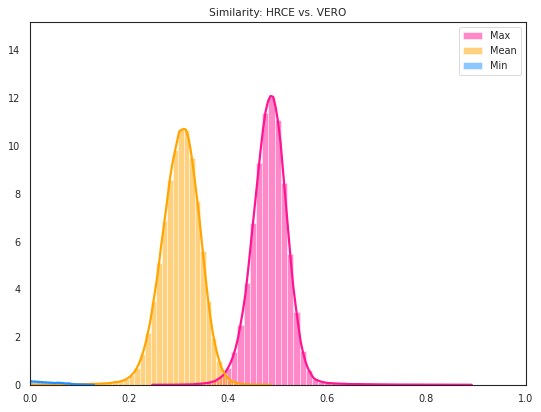

In [ ]:
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})
plt.figure(figsize=(8, 6), dpi= 80)
plt.title('Similarity: HRCE vs. VERO')
sns.distplot(sims_max, color="deeppink", label="Max", **kwargs) 
sns.distplot(sims_mean, color="orange", label="Mean", **kwargs)
sns.distplot(sims_min, color="dodgerblue", label="Min", **kwargs)
plt.xlim(0, 1)
plt.legend();

**The above figure indicates that there is NO significant similarity between HRCE and VERO.**

**End of Part 3**